In [12]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import os
import sys
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import torch

plt.rcParams['figure.figsize'] = [20, 10]

script_dir = os.path.dirname('__file__')
sys.path.append(os.path.join(script_dir, '..', 'src'))

import data_handler

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
train_data, _, _ = data_handler.setup_data(hparams={'path': os.path.expanduser(os.path.join('~', 'share-all', 'derma-data', 'archive')), 't': ""})

Trainig transforms: None


In [14]:
train_data

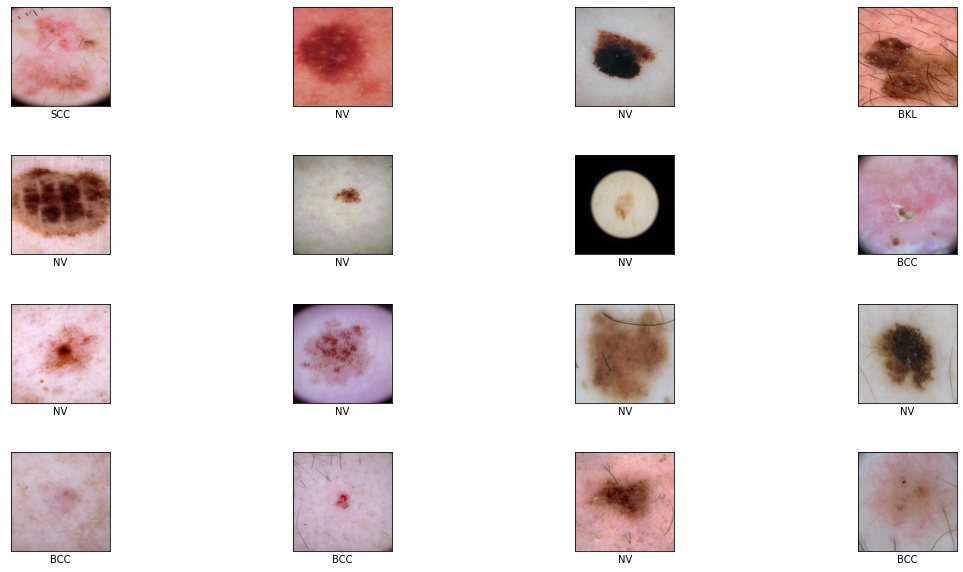

In [15]:
# Show 16 images:
f, ax = plt.subplots(4, 4)
f.subplots_adjust(hspace=0.5, wspace= 0.05)
for i in range(0, 4):
    for j in range(0, 4):
        ax[i, j].imshow(train_data[i * 4 + j][0].transpose(0,2).numpy())
        ax[i,j].yaxis.set_visible(False)
        # ax[i,j].xaxis.set_visible(False)
        ax[i,j].set_xlabel(train_data.idx_to_class[train_data[4*i + j][1]])
        ax[i,j].xaxis.set_ticklabels([])
        ax[i,j].xaxis.set_ticklabels([])
        ax[i,j].xaxis.set_ticks([])

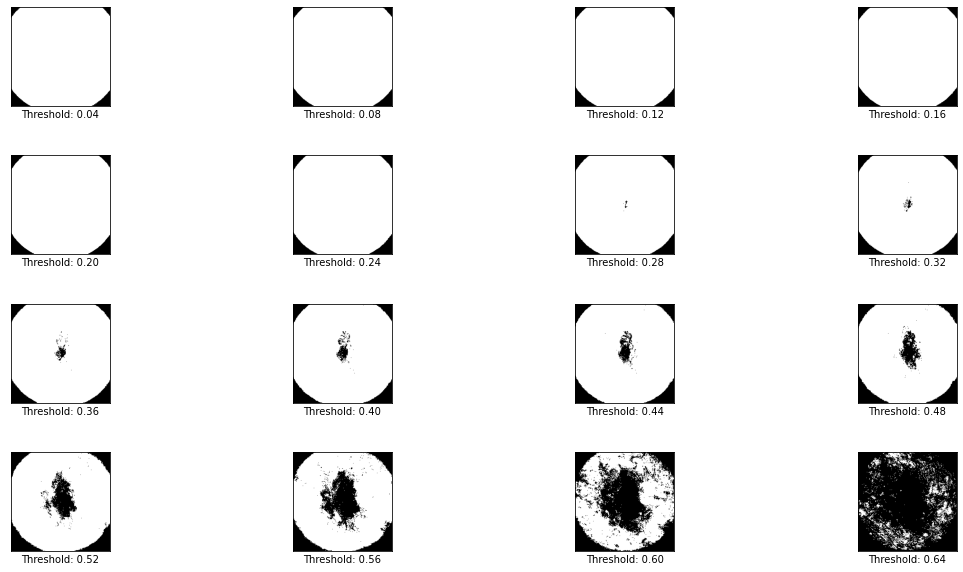

In [21]:
img = None
for k in range(0,100):
    if (train_data[k][0].min() < 0.005):
        img = k
        f, ax = plt.subplots(4, 4)
        f.subplots_adjust(hspace=0.5, wspace= 0.05)
        for i in range(0, 4):
            for j in range(0, 4):
                threshold = 0.04 * (i * 4 + j) + 0.04
                grey_img = (torch.sum(train_data[k][0], dim=0) / 3)
                ax[i, j].imshow((1.0 * (grey_img >= threshold)).numpy(), cmap="gray")
                ax[i,j].yaxis.set_visible(False)
                # ax[i,j].xaxis.set_visible(False)
                ax[i,j].set_xlabel(f"Threshold: {threshold:.2f}")
                ax[i,j].xaxis.set_ticklabels([])
                ax[i,j].xaxis.set_ticklabels([])
                ax[i,j].xaxis.set_ticks([])
        break   # Search for the first image with a black border

plt.imshow(train_data[k][0].transpose(0,2).numpy(), cmap="gray")